C:\Users\robin\AppData\Local\Temp\ipykernel_17056\4232333789.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  prepData.type = prepData['label'].astype(catType)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


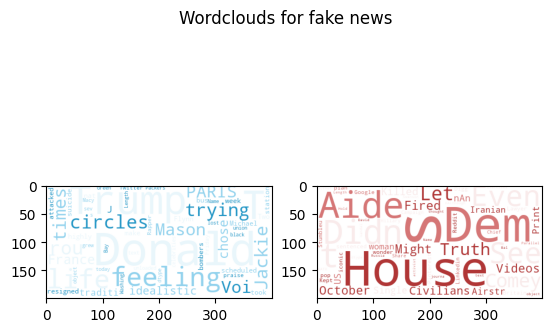

   000   10  100        11   12        15        16   20      2012  2013  ...  \
0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.029412   0.0  ...   
1  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   0.0  ...   
2  0.0  0.0  0.0  0.017959  0.0  0.000000  0.021319  0.0  0.000000   0.0  ...   
3  0.0  0.0  0.0  0.000000  0.0  0.138463  0.000000  0.0  0.000000   0.0  ...   
4  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   0.0  ...   

   wrong  wrote      year     years  yes       yet  york       you  young  \
0    0.0    0.0  0.017217  0.016426  0.0  0.000000   0.0  0.013975    0.0   
1    0.0    0.0  0.000000  0.020086  0.0  0.000000   0.0  0.068355    0.0   
2    0.0    0.0  0.000000  0.011367  0.0  0.031094   0.0  0.058026    0.0   
3    0.0    0.0  0.000000  0.000000  0.0  0.000000   0.0  0.000000    0.0   
4    0.0    0.0  0.069469  0.066280  0.0  0.000000   0.0  0.000000    0.0   

       your  
0  0.000000  
1  0.048757  
2  0.000

In [9]:
from matplotlib import colors 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score #error 1 accuracy.score changed to accuracy_score
from sklearn.metrics import confusion_matrix

url = "https://raw.githubusercontent.com/HAN-M3DM-Data-Mining/data-mining-s2y2223-KevHok/master/datasets/NB-fakenews.csv"
rawDF = pd.read_csv(url) #error 2 changed excel to csv
rawDF.head()

# rawDF.replace(to_replace = 0, value="real", inplace=True)
# rawDF.replace(to_replace = 1, value="fake", inplace=True)

catType = pd.CategoricalDtype(categories=[0, 1], ordered=False)
prepData = rawDF.fillna('')
prepData.type = prepData['label'].astype(catType)
prepData.info()


prepData.value_counts()

prepData.value_counts(normalize=True)

realNews = ' '.join([str(prepData[prepData.type==0]['text'])])
fakeNews = ' '.join([str(prepData[prepData.type==1]['text'])])

colorListReal=['#e9f6fb','#92d2ed','#2195c5']
colorListFake=['#f9ebeb','#d57676','#b03636']
colormapReal=colors.ListedColormap(colorListReal)
colormapFake=colors.ListedColormap(colorListFake)
wordcloudReal = WordCloud(background_color='white', colormap=colormapReal).generate(realNews)
wordcloudFake = WordCloud(background_color='white', colormap=colormapFake).generate(fakeNews)

# Display the generated image:
# the matplotlib way:
fig, (wc1, wc2) = plt.subplots(1, 2)
fig.suptitle('Wordclouds for fake news')
wc1.imshow(wordcloudReal)
wc2.imshow(wordcloudFake)
plt.show() #Error 3 removed worldcloudfake because plt.show does not require any variables to work.

vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(prepData.text)
wordsDF = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
print(wordsDF.head())

xTrain, xTest, yTrain, yTest = train_test_split(wordsDF, prepData.type)

bayes = MultinomialNB()
bayes.fit(xTrain, yTrain)

yPred = bayes.predict(xTest)
yTrue = yTest

accuracyScore = accuracy_score(yTrue, yPred)
print(f'Accuracy: {accuracyScore}')

matrix = confusion_matrix(yTrue, yPred)
labelNames = pd.Series(["Real", "Fake"]) #Error 4 changed 0 and 1 to Real and fake
betterMatrix = pd.DataFrame(matrix, columns='Predicted ' + labelNames, index='Is ' + labelNames)
print(betterMatrix)